# Enter Student Name & ID

In [ ]:
student_id = 400109768  #@param {type:"integer"}
student_name = "Seyed Hamid Ghasemi" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400109768
your name: Seyed Hamid Ghasemi


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [ ]:
import numpy as np

In [ ]:
def myPCA(X, num_components):
    """
    This function performs Principal Component Analysis (PCA) on a given dataset X.

    Parameters:
    X (numpy array): The input dataset.
    num_components (int): The number of principal components to retain.

    Returns:
    X_pca (numpy array): The dataset transformed to the new coordinate system.
    """

    # Calculate the mean of the dataset
    mean = np.mean(X, axis=0)

    # Subtract the mean from each data point to center the data
    centered_data = (X - mean)

    # Calculate the covariance matrix
    covariance_matrix = np.cov(centered_data, rowvar=False)

    # Calculate the eigenvectors and eigenvalues of the covariance matrix
    eigvals, eigvecs = np.linalg.eig(covariance_matrix)
    #print(eigvecs)

    # Sort the eigenvectors and eigenvalues in descending order of eigenvalues
    idx = np.argsort(-eigvals)
    eigvals = eigvals[idx]
    #print(eigvals)
    eigvecs = eigvecs[:, idx]

    # Select the top num_components eigenvectors
    eigvecs = eigvecs[:, :num_components]
    #print(eigvecs)

    # Transform the data to the new coordinate system
    X_pca = np.dot(centered_data, eigvecs)

    return X_pca, eigvecs

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

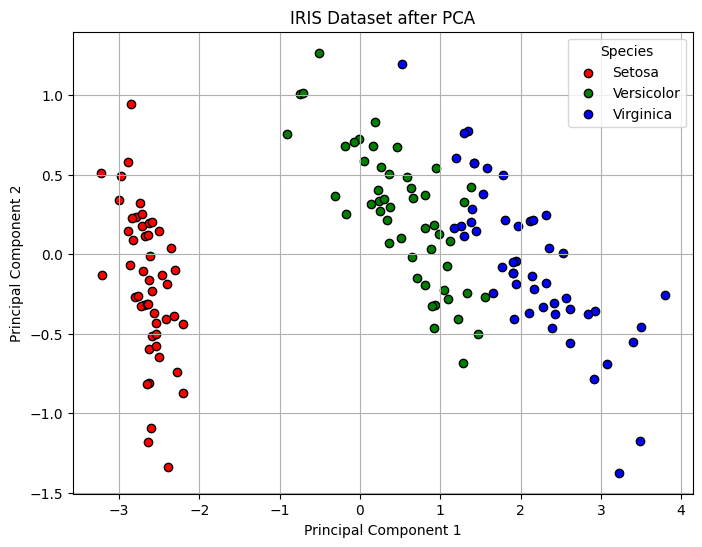

In [ ]:
# myPCA on IRIS

# Load the IRIS dataset
iris = load_iris()
X = iris.data

# Perform PCA on the IRIS dataset
X_pca, _ = myPCA(X, 2)

# Plot the results
plt.figure(figsize=(8, 6))

# Create separate scatter plots for each species
setosa = plt.scatter(X_pca[iris.target == 0, 0], X_pca[iris.target == 0, 1], c='r', edgecolor='black', label='Setosa')
versicolor = plt.scatter(X_pca[iris.target == 1, 0], X_pca[iris.target == 1, 1], c='g', edgecolor='black', label='Versicolor')
virginica = plt.scatter(X_pca[iris.target == 2, 0], X_pca[iris.target == 2, 1], c='b', edgecolor='black', label='Virginica')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('IRIS Dataset after PCA')

# Add a legend
plt.legend(loc='upper right', title='Species')

# Add a grid
plt.grid(True)

plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `

**Representing Faces as High-Dimensional Vectors**

In face recognition, each face image is first converted into a high-dimensional vector by concatenating the rows or columns of the image pixels. For example, a 100x100 pixel grayscale face image has 10,000 dimensions when represented as a vector.


---


**Principal Component Analysis (PCA)**

PCA is then applied to this set of face vectors to find the directions of maximum variance in the high-dimensional space. PCA works by calculating the covariance matrix of the centered face vectors (each vector has the mean face vector subtracted from it).
The eigenvectors of this covariance matrix are calculated. These eigenvectors define an orthogonal basis that captures the main modes of variation in the face images. They are called eigenfaces because they look like somewhat blurry, ghostly faces when reshaped back into 2D images.



---


**Eigenfaces as Principal Components**

The eigenfaces are the principal components of the face image space. They are ordered by their corresponding eigenvalues, which represent the amount of variance captured by each eigenvector.
By selecting the top K eigenfaces with the largest eigenvalues, we obtain a K-dimensional subspace that captures most of the variance in the original high-dimensional face space. This is the key idea behind dimensionality reduction using PCA.

---


**Representing Faces in the Eigenface Subspace**

Each individual face can be well approximated by a weighted sum of the top eigenfaces. The weights or coefficients of this linear combination form a K-dimensional feature vector that represents that face.
To obtain this feature vector, the face vector is simply projected onto the eigenface subspace by taking the dot product with each of the top K eigenfaces. This projection is equivalent to finding the weights that minimize the reconstruction error.

---


**Face Recognition using Eigenfaces**
To recognize a new face, it is first converted to a vector and projected onto the eigenface subspace to obtain its K-dimensional feature vector. This feature vector is then compared to the feature vectors of known individuals in the training set.

The comparison is typically done by finding the training face with the smallest Euclidean distance between its feature vector and the test face's feature vector. If this distance is below a threshold, the test face is classified as that individual. Otherwise, it is classified as unknown.


So in summary, eigenfaces provide a way to extract a compact, discriminative feature representation of faces using PCA. This allows efficient face recognition by comparing the feature vectors of known and unknown faces. The eigenfaces themselves are the principal components of the training faces, capturing the main modes of variation in the face image space.


### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [ ]:
pip install opencv-python


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np

In [ ]:
# Set the directory containing the face images
data_dir = '/content/drive/MyDrive/ORL'

# Get a list of all the subdirectories (one per person)
person_dirs = [os.path.join(data_dir, d) for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Initialize the training and testing data matrices
X_train = []
X_test = []
y_train = []
y_test = []

# Iterate through each person's directory
for i, person_dir in enumerate(person_dirs):
    # Get a list of all the image files in the directory
    image_files = [os.path.join(person_dir, f) for f in os.listdir(person_dir) if f.endswith('.bmp')]

    # Sort the image files to ensure consistent ordering
    image_files.sort()

    # Use the first 5 images for training and the last 5 for testing
    for j, image_file in enumerate(image_files):
        image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        image_vector = image.flatten()  # Flatten the image to a vector

        if j < 5:
            X_train.append(image_vector)
            y_train.append(i)
        else:
            X_test.append(image_vector)
            y_test.append(i)

# Convert the training and testing data to numpy arrays
X_train = np.array(X_train)
X_test =  np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (200, 2304)
X_test shape: (200, 2304)
y_train shape: (200,)
y_test shape: (200,)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [ ]:
# make satandard data:
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

In [ ]:
num_components = 45
# PCA function on train set
X_train_pca, eigvecs_train = myPCA(X_train, num_components)
X_train_pca = np.real(X_train_pca)
# PCA  on test set
X_test_pca = np.dot(X_test, eigvecs_train)
X_test_pca = np.real(X_test_pca)

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [ ]:
# Train the LDA classifier on the PCA-transformed training data
lda = LDA()
lda.fit(X_train_pca, y_train)

# Predict the labels for the PCA-transformed testing data
y_pred = lda.predict(X_test_pca)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


**dimensions of PCA from 1 to 20:**

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
@ num_components: 1  Accuracy: 0.10
@ num_components: 2  Accuracy: 0.12
@ num_components: 3  Accuracy: 0.27
@ num_components: 4  Accuracy: 0.42
@ num_components: 5  Accuracy: 0.59
@ num_components: 6  Accuracy: 0.64
@ num_components: 7  Accuracy: 0.77
@ num_components: 8  Accuracy: 0.79
@ num_components: 9  Accuracy: 0.81
@ num_components: 10  Accuracy: 0.83
@ num_components: 11  Accuracy: 0.82
@ num_components: 12  Accuracy: 0.84
@ num_components: 13  Accuracy: 0.88
@ num_components: 14  Accuracy: 0.89
@ num_components: 15  Accuracy: 0.89
@ num_components: 16  Accuracy: 0.90
@ num_components: 17  Accuracy: 0.90
@ num_components: 18  Accuracy: 0.91
@ num_components: 19  Accuracy: 0.91
@ num_components: 20  Accuracy: 0.91


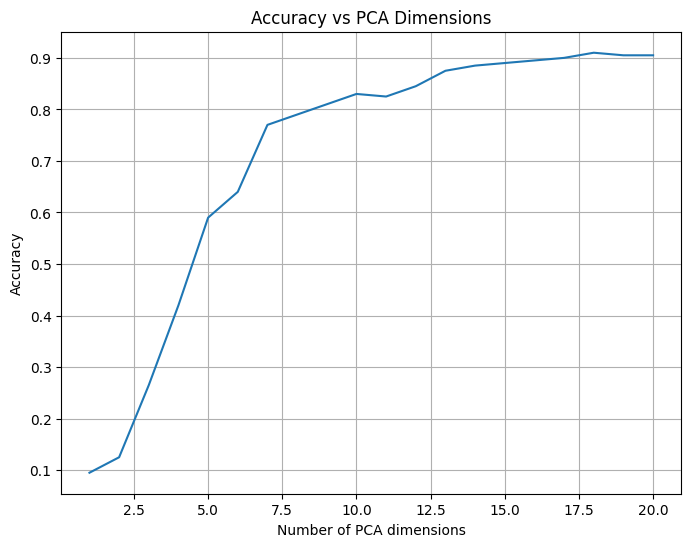

In [ ]:
pca_dims = np.arange(1, 21, 1)
print(pca_dims)
accuracies = []

for num_components  in pca_dims:

  # PCA function on train set
  X_train_pca, eigvecs_train = myPCA(X_train, num_components)
  X_train_pca = np.real(X_train_pca)
  # PCA  on test set
  X_test_pca = np.dot(X_test, eigvecs_train)
  X_test_pca = np.real(X_test_pca)

  # Train the LDA classifier on the PCA-transformed training data
  lda = LDA()
  lda.fit(X_train_pca, y_train)

  # Predict the labels for the PCA-transformed testing data
  y_pred = lda.predict(X_test_pca)

  # Calculate the accuracy score
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
  print(f"@ num_components: {num_components}  Accuracy: {accuracy:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(pca_dims, accuracies)
plt.xlabel('Number of PCA dimensions')
plt.ylabel('Accuracy')
plt.title('Accuracy vs PCA Dimensions')
plt.grid()
plt.show()



**dimensions of PCA from 40 to 100:**

In [ ]:
pca_dims = np.arange(40, 101, 1)
accuracies = []

for num_components  in pca_dims:

  # PCA function on train set
  X_train_pca, eigvecs_train = myPCA(X_train, num_components)
  X_train_pca = np.real(X_train_pca)
  # PCA  on test set
  X_test_pca = np.dot(X_test, eigvecs_train)
  X_test_pca = np.real(X_test_pca)

  # Train the LDA classifier on the PCA-transformed training data
  lda = LDA()
  lda.fit(X_train_pca, y_train)

  # Predict the labels for the PCA-transformed testing data
  y_pred = lda.predict(X_test_pca)

  # Calculate the accuracy score
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
  print(f"@ num_components: {num_components}  Accuracy: {accuracy}")

@ num_components: 40  Accuracy: 0.93
@ num_components: 41  Accuracy: 0.94
@ num_components: 42  Accuracy: 0.935
@ num_components: 43  Accuracy: 0.945
@ num_components: 44  Accuracy: 0.95
@ num_components: 45  Accuracy: 0.95
@ num_components: 46  Accuracy: 0.95
@ num_components: 47  Accuracy: 0.95
@ num_components: 48  Accuracy: 0.945
@ num_components: 49  Accuracy: 0.945
@ num_components: 50  Accuracy: 0.945
@ num_components: 51  Accuracy: 0.945
@ num_components: 52  Accuracy: 0.95
@ num_components: 53  Accuracy: 0.95
@ num_components: 54  Accuracy: 0.945
@ num_components: 55  Accuracy: 0.95
@ num_components: 56  Accuracy: 0.94
@ num_components: 57  Accuracy: 0.935
@ num_components: 58  Accuracy: 0.92
@ num_components: 59  Accuracy: 0.93
@ num_components: 60  Accuracy: 0.935
@ num_components: 61  Accuracy: 0.93
@ num_components: 62  Accuracy: 0.935
@ num_components: 63  Accuracy: 0.94
@ num_components: 64  Accuracy: 0.93
@ num_components: 65  Accuracy: 0.935
@ num_components: 66  Accur

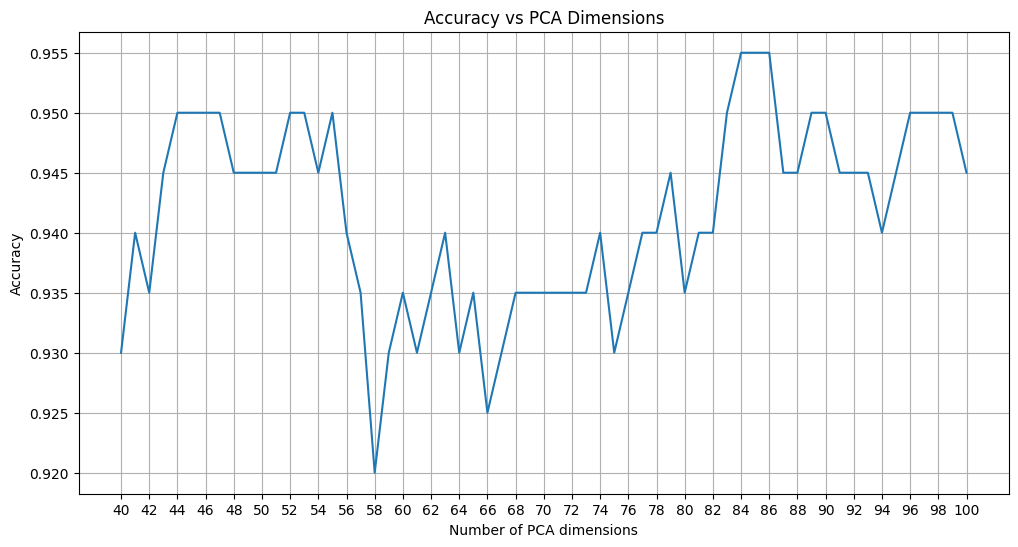

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(pca_dims, accuracies)
plt.xlabel('Number of PCA dimensions')
plt.ylabel('Accuracy')
plt.title('Accuracy vs PCA Dimensions')
plt.grid()
plt.xticks(pca_dims[::2])
plt.show()

As can be seen in the second graph, the output accuracy is oscillating around the value of 0.94 for the range of 40 to 100.

If we only consider this range, the number of features required to achieve the maximum accuracy of 0.955 is 84.

However, if we consider a wider range, as examined in the first graph between 1 and 20, we observe that the elbow point of the accuracy plot as a function of the number of features occurs at 18, with an accuracy of 0.91. Effectively, the accuracy only increases by 0.045 from 18 to 84, while the computational complexity at 84 is much higher than at 18.

Therefore, if we were allowed to examine the full range and then select the optimal number of features, choosing 18 features would be the optimal selection.